# Week-7

Decision trees and KNN

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams['font.size'] = 15

## Decision Trees

**Decision stumps**

A decision stump is a decision tree that has a single question at the root node which splits into two leaf nodes. A decision stump partitions the dataset based on a single question: $f_k < \theta$. This is therefore the simplest decision tree that we can come up with.

---
Use the following decision stump for problems 1 and 3: The root has $1000$ data-points out of which $200$ belong to class-1. The left child-node has $100$ data-points out of which $50$ belong to class-1.

### Problem-1

Write a function `entropy` that accepts the proportion of points that belong to class-1 in a node as argument and returns the entropy. Use $\log_2$ for all computations.

Use this function to compute the entropy of the parent node.

In [ ]:
### Solution ###
def entropy(p):
    if p == 0 or p == 1:
        return 0
    return -p * np.log2(p) - (1 - p) * np.log2(1 - p)

p = 200 / 1000
entropy(p)

0.7219280948873623

### Problem-2

Plot the entropy of a node as a function of $p$, the proportion of data-points that belong to class $+1$.

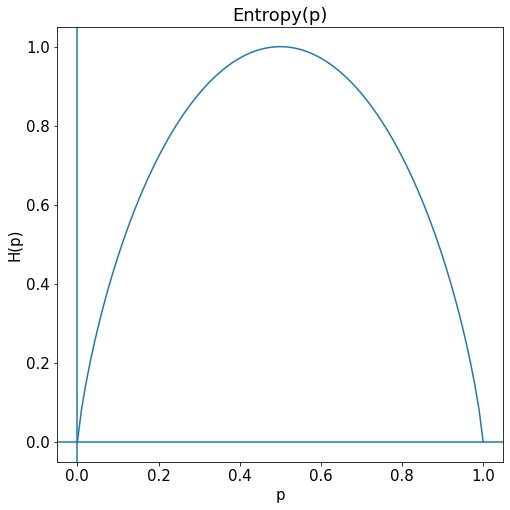

In [ ]:
### Solution ###
p = np.linspace(0, 1, 100)
plt.plot(p, [entropy(x) for x in p])
plt.title('Entropy(p)')
plt.xlabel('p')
plt.ylabel('H(p)')
plt.axvline(0)
plt.axhline(0);

### Problem-3

Write a function `IG` that accepts the following arguments:

- `E`: entropy of the parent node `Q`
- `El`: entropy of the left child `L`
- `Er`: entropy of the right child `R`
- `gamma`: proportion of data-points in left child

Use this function to compute the information gain for the parent node.

In [ ]:
### Solution ###
def IG(E, El, Er, gamma):
    return E - gamma * El - (1 - gamma) * Er

# Compute
p = 200 / 1000
gamma = 100 / 1000
q = 50 / 100
r = 150 / 900
E = entropy(p)
El = entropy(q)
Er = entropy(r)
IG(E, El, Er, gamma)

0.03690791540384364

### Problem-4

Consider a decision stump with $1000$ data-points. Call the root node $Q$ and the left and right leaf nodes $L$ and $R$. 

- The proportion of data-points that belong to class $+1$ in $Q$ is equal to $0.4$
- The proportion of points in the left node is equal to $0.7$, that is, $\gamma = 0.7$
-  $q$ is the proportion of data-points that belong to class $+1$ in $L$

What are the minimum ($q_{\min}$) and maximum ($q_{\max}$) values of $q$?

In [ ]:
### Solution ###
n = 1000
p = 0.4
gamma = 0.7
qmax = min(p / gamma, 1)
qmin = max(0, (p + gamma - 1) / gamma)
print(f'Q_min = {qmin:.2f}, Q_max = {qmax:.2f}')

Q_min = 0.14, Q_max = 0.57


### Problem-5

Using the above information, plot the information gain of the root as a function of $q$, where $q \in [q_{\min}, q_{\max}]$. Record at least two interesting observations.

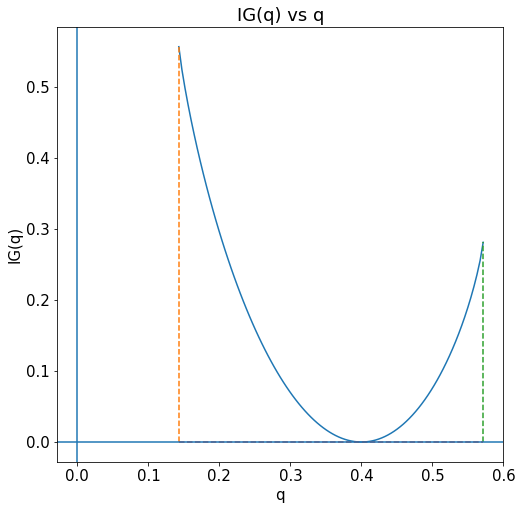

In [ ]:
### Solution ###
q = np.linspace(qmin, qmax, 100)
r = (p - gamma * q) / (1 - gamma)

# Entropy of parent
E = entropy(p)

# Entropy of left child
El = np.array([entropy(x) for x in q])

# Entropy of right child
Er = np.array([entropy(x) for x in r])

# Information gain
IG_val = IG(E, El, Er, gamma)
# Plot
plt.plot(q, IG_val)

plt.plot([qmin, qmin], [0, IG_val[q == qmin]], '--')
plt.plot([qmax, qmax], [0, IG_val[q == qmax]], '--')
plt.plot([qmin, qmax], [0, 0], '--')
plt.title('IG(q) vs q')
plt.ylabel('IG(q)')
plt.xlabel('q');
plt.axhline(0)
plt.axvline(0);

### Problem-6

We will work with the dataset `X` for the next five problems. Visualize the data using a scatter plot. Color the points that belong to class $+1$ using "green" and those that belong to class $0$ using "red".

In [ ]:
### Data ###
### DO NOT CHANGE THE CONTENTS OF THIS CELL ###
rng = np.random.default_rng(seed = 1001)
n_per = 50
cov = np.eye(2) / 10
X1 = rng.multivariate_normal([1, 1], cov, n_per)
y1 = np.ones(n_per)
X2 = rng.multivariate_normal([5, 3], cov , n_per)
y2 = np.zeros(n_per)
X3 = rng.multivariate_normal([3, 4], cov, n_per)
y3 = np.ones(n_per)
X4 = rng.multivariate_normal([3, 2], cov, n_per)
y4 = np.zeros(n_per)
X = np.concatenate((X1, X2, X3, X4), axis = 0)
y = np.int64(np.concatenate((y1, y2, y3, y4)))
### DO NOT CHANGE THE CONTENTS OF THIS CELL ###

(200, 2) (200,)


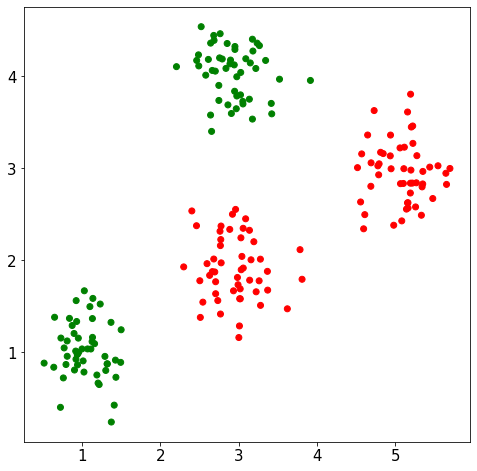

In [ ]:
### Solution ###
c = np.array(['red', 'green'])
print(X.shape, y.shape)
plt.scatter(X[:, 0], X[:, 1], c = c[y]);

### Problem-7

If you were to use a decision stump as a classifier:

- What is the best question $f_k < \theta$?
    - enter the feature index, $k$ (use zero-indexing)
    - enter the value of $\theta$
- What is the information gain for this question?

---

Write the function named `best_split` to solve this problem:

The function should accept the feature matrix `X` and the label vector `y` as arguements. It should return the tuple `(feat_best, value_best, ig_best)`.

In [ ]:
### Solution ###
def best_split(X, y):
    min_val, max_val = X.min(), X.max()
    vals = np.linspace(min_val, max_val, 10)
    p = X[y == 1].shape[0] / X.shape[0]
    E = entropy(p)
    ig_best, value_best, feat_best = 0, 0, 0
    for val in vals:
        for feat in [0, 1]:
            left = y[X[:, feat] < val]
            right = y[X[:, feat] >= val]
            gamma = left.shape[0] / X.shape[0]
            q = r = 0
            if left.shape[0] != 0:
                q = left[left == 1].shape[0] / left.shape[0]
            if right.shape[0] != 0:
                r = right[right == 1].shape[0] / right.shape[0]
            El = entropy(q)
            Er = entropy(r)
            ig = E - gamma * El - (1 - gamma) * Er
            assert ig >= 0
            if ig > ig_best:
                ig_best = ig
                value_best = val
                feat_best = feat
    return feat_best, value_best, ig_best

best_split(X, y)

(0, 2.0612616131244654, 0.31127812445913283)

### Problem-8

Grow a decision tree for this problem. You may have to use two programming concepts:

- recursion
- binary trees

Once you have grown the tree, answer the following questions:

- How many internal nodes does your tree have?
- How many leaf nodes does it have?

In [ ]:
### Solution ###
tree = dict()

def grow_tree(X, y, key):
    p = X[y == 1].shape[0] / X.shape[0]
    E = entropy(p)
    if E <= 0.2:
        label = 0
        if y[y == 1].shape[0] / y.shape[0] > 0.5:
            label = 1
        tree[key] = {'state': 'leaf', 'label': label}
        return
    feat_best, val_best, _ = best_split(X, y)
    tree[key] = {'state': 'internal', 'question': (feat_best, val_best)}
    left_ind = X[:, feat_best] < val_best
    right_ind = X[:, feat_best] >= val_best    
    left_X = X[left_ind]
    left_y = y[left_ind]
    right_X = X[right_ind]
    right_y = y[right_ind]
    grow_tree(left_X, left_y, 2 * key + 1)
    grow_tree(right_X, right_y, 2 * key + 2)

grow_tree(X, y, 0)
tree

{0: {'state': 'internal', 'question': (0, 2.0612616131244654)},
 1: {'state': 'leaf', 'label': 1},
 2: {'state': 'internal', 'question': (1, 3.1768030380100716)},
 5: {'state': 'leaf', 'label': 0},
 6: {'state': 'internal', 'question': (0, 4.217687814261158)},
 13: {'state': 'leaf', 'label': 1},
 14: {'state': 'leaf', 'label': 0}}

### Problem-9

Predict the label of the point $(3, 4)$.

In [ ]:
### Solution ###
def predict(tree, x, ind):
    if tree[ind]['state'] == 'leaf':
        return tree[ind]['label']
    feat, val = tree[ind]['question']
    if x[feat] < val:
        ind = 2 * ind + 1
        return predict(tree, x, ind)
    else:
        ind = 2 * ind + 2
        return predict(tree, x, ind)

c[predict(tree, [3, 4], 0)]

'green'

### Problem-10

Plot the decision boundary.

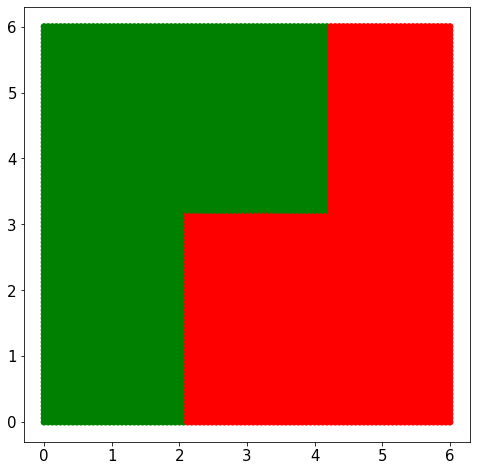

In [ ]:
### Solution ###
x = np.linspace(0, 6, 100)
floor = [ ]
color = [ ]
for i in range(x.shape[0]):
    for j in range(x.shape[0]):
        floor.append([x[i], x[j]])
        color.append(c[predict(tree, [x[i], x[j]], 0)])
floor = np.array(floor)
plt.scatter(floor[:, 0], floor[:, 1], c = color);

## KNN


In [ ]:
### Data ###
### DO NOT EDIT THIS CELL ###
rng = np.random.default_rng(seed = 1001)
X = rng.uniform(-10, 10, (100, 2))
y = np.int32(np.zeros(X.shape[0]))
y[X[:, 1] > X[:, 0]] = 1
X = np.concatenate((X, 
                   rng.multivariate_normal([-5, 5], np.eye(2), 10)), 
                   axis = 0)
y = np.concatenate((y, np.int32(np.zeros(10))))
### DO NOT EDIT THIS CELL ###

### Problem-11

Visualize the data using a scatter plot. Use red for class $0$ and green for class $1$.

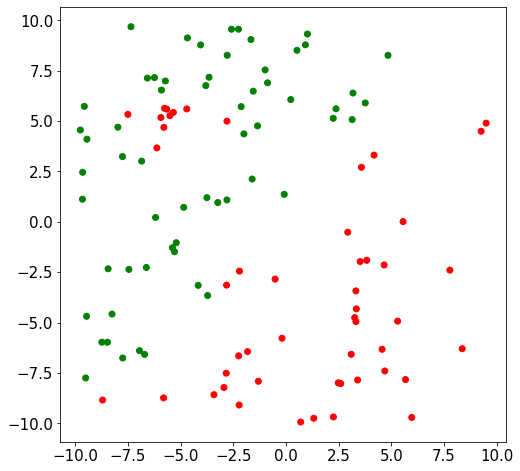

In [ ]:
### Solution ###
c = np.array(['red', 'green'])
plt.scatter(X[:, 0], X[:, 1], c = c[y])

### Problem-12

Write a function `predict` that accepts the following arguments: 

- `X` - feature matrix
- `y` - label vector
- `x_test` - test data-point
- `k` - number of neighbors

The function should return the prediction for the point `x_test`. Use this function to compute the predicted label for the point $(-3, -2)$ with $k = 10$.

In [ ]:
### Solution ###
def predict(X, y, x_test, k = 3):
    dist = np.linalg.norm(X - x_test.reshape(1, 2), axis = 1)
    nearest_k = np.argsort(dist)[: k]
    voter = y[nearest_k]
    if sum(voter) > len(voter) / 2:
        return 1
    else:
        return 0
c[predict(X, y, np.array([-3, -2]), 10)]

'green'

### Problem-13

Plot the decision boundary for different values of $k$:

- $k = 1$
- $k = 3$
- $k = 7$
- $k = 15$
- $k = 31$
- $k = 63$

Record at least two observations.

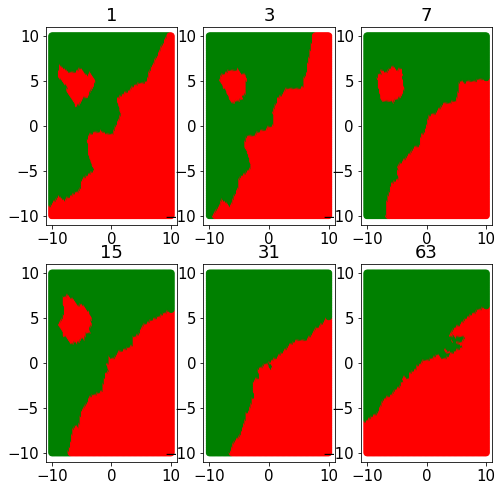

In [ ]:
### Solution ###
def boundary(k):
    x = np.linspace(-10, 10, 100)
    floor = [ ]
    color = [ ]
    for i in range(x.shape[0]):
        for j in range(x.shape[0]):
            floor.append([x[i], x[j]])
            color.append(c[predict(X, y, np.array([x[i], x[j]]), k)])
    floor = np.array(floor)
    plt.scatter(floor[:, 0], floor[:, 1], c = color);
    plt.title(k)

for ind, k in enumerate([1, 3, 7, 15, 31, 63]):
    plt.subplot(2, 3, ind + 1)
    boundary(k)